![Twitter Sentiment Analysis](tt.png)

# Sentiment Analysis From Scratch: A Deep Dive into Twitter Data

### Notebook 2: Word Vectorization
In the vast world of Natural Language Processing (NLP), transforming textual data into a numerical format is a foundational step. This notebook delves deep into the vectorization aspect of the sentiment analysis project, turning raw tweet text into vectors that can be fed into machine learning algorithms.

The journey begins with the preparation of the dataset, splitting it into training and testing sets, ensuring a robust evaluation process. Following this, several vectorization techniques are explored, each with its unique approach and advantages:

**CountVectorizer:** A simple yet effective method that transforms the text into vectors based on word count.

**TF-IDF Vectorizer:** Going a step beyond mere counting, this method weighs terms based on their importance in the corpus, distinguishing between common and rare terms.

**Word2Vec:** A more advanced technique that captures the semantic meaning of words based on their context. Both Skip-Gram and CBOW models are explored to achieve this

Additionally, a logistic regression model is trained and evaluated as a preliminary step to gauge the effectiveness of the vectorized data. This notebook sets the stage for subsequent modeling and deep analysis, ensuring the data is well-prepared and understood.

---

## Importing Libs

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import datetime
from gensim.models import Word2Vec
from nltk import tokenize
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from transformers import BertTokenizer, BertModel
import torch
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from IPython.display import clear_output
%matplotlib inline

## Reading cleaned dataframe

In [2]:
tweets = pd.read_csv('training.1600000.processed.noemoticon_cleaned.csv')
tweets.head(3)

,target,text,text2,text3,text4,text5,text6
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot - awww, that's bummer. shoulda got...",switchfoot awww bummer shoulda got david carr ...,switchfoot awww bummer shoulda got david carr ...,switchfoot awww bummer shoulda got david carr ...,switchfoot awww bummer shoulda got david carr ...
1,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...,upset update facebook texting ... might cry re...,upset update facebook texting ... might cry re...,upset updat facebook text ... might cri result...,upset updat facebook text might cri result sch...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan dived many times ball. managed save ...,kenichan dived many times ball managed save 50...,kenichan dived many times ball managed save 50...,kenichan dive mani time ball manag save 50 res...,kenichan dive mani time ball manag save rest g...


## Splitting data into train and test

Before training any machine learning model, it's essential to split the data into training and testing sets. This allows the model to be trained on a portion of the data and tested on an unseen part, ensuring a fair evaluation of performance.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(tweets['text6'], tweets['target'], random_state = 5, train_size=0.8)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

## Logistic Regression: Functions for Model Training and Evaluation

Logistic regression offers a straightforward and effective approach to binary classification. In this section, we define functions to train the model and evaluate its performance.

In [4]:
def classificate_lr (X_train, X_test, y_train, y_test):
    t1 = datetime.now()
    logistic_regression = LogisticRegression(solver = "lbfgs", max_iter=10000)
    logistic_regression.fit(X_train, y_train)
    t2 = datetime.now()
    
    y_pred = logistic_regression.predict(X_test)
    
    print('Trained model. The training process lasted {} seconds.'.format((t2-t1).total_seconds(), '2f'))
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
          
    print('Accuracy Score: {:.2f}%'.format(accuracy * 100))
    print('Precision Score: {:.2f}%'.format(precision * 100))
    print('Recall Score: {:.2f}%'.format(recall * 100))
    print('F1 Score: {:.2f}%'.format(f1 * 100))
    
    return logistic_regression, y_pred

In [5]:
def conf_matrix(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    ax= plt.subplot()
    hm = sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues", square=True);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    
    ax.set_xlabel('Predicted label');
    ax.set_ylabel('True label'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1']); 
    ax.yaxis.set_ticklabels(['0', '1']);   

---

## Exploring Vectorization Methods

In Natural Language Processing (NLP), raw textual data is inherently unstructured and cannot be directly fed into machine learning algorithms, which require numerical input. Vectorization bridges this gap by converting text into numerical vectors, representing the content and structure of the original data in a format that algorithms can understand and process. By doing so, vectorization unlocks the potential to derive meaningful insights and patterns from textual data.


### CountVectorizer
This is a simple method for vectorizing text data, part of the Bag of Words (BoW) approach. It transforms the text into vectors by counting the number of times each word appears in the text. This results in a sparse matrix where each row corresponds to a document and each column is a unique word from the entire corpus

Trained model. The training process lasted 4.282345 seconds.
Accuracy Score: 59.50%
Precision Score: 58.63%
Recall Score: 64.72%
F1 Score: 61.52%


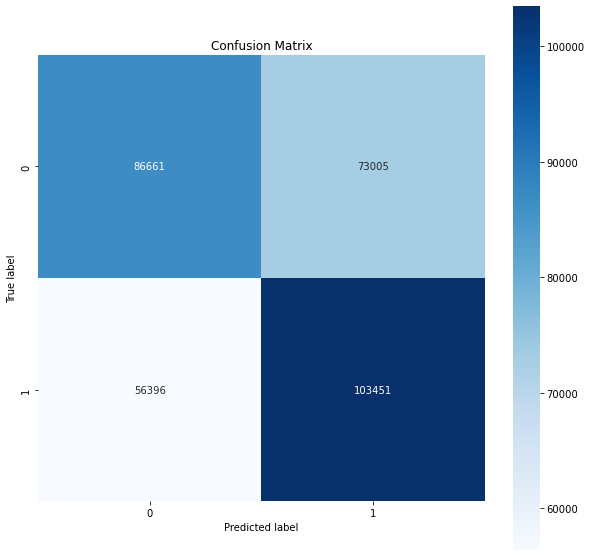

In [6]:
count_vectorizer = CountVectorizer(max_features=300)
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.fit_transform(X_test)

lr_cv, y_pred_cv = classificate_lr(X_train_cv, X_test_cv, y_train, y_test)
conf_matrix(y_test, y_pred_cv)

### TF-IDF Vectorizer
This method also transforms text into vectors, but it does so using the Term Frequency-Inverse Document Frequency (TF-IDF) weighting scheme. It calculates the frequency of each word in a document (Term Frequency), but then scales these counts based on how common the word is across all documents (Inverse Document Frequency). This helps to highlight words that are more unique to a document, giving them more weight than common words.

Trained model. The training process lasted 5.114 seconds.
Accuracy Score: 59.41%
Precision Score: 58.70%
Recall Score: 63.63%
F1 Score: 61.07%


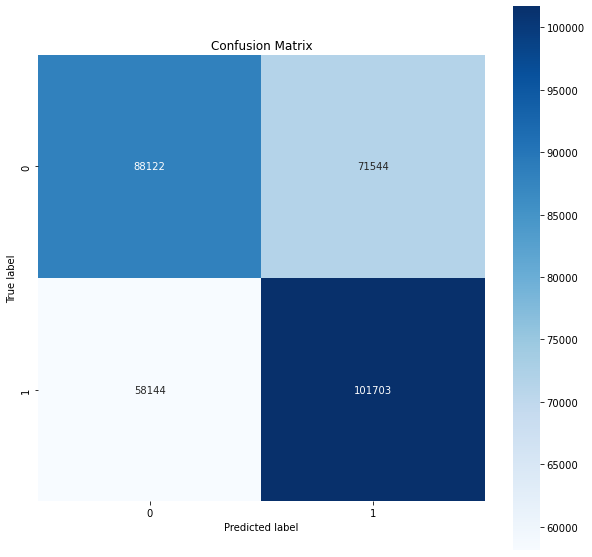

In [7]:
tfidf_vectorizer = TfidfVectorizer(max_features=300)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.fit_transform(X_test)

lr_tfidf, y_pred_tfidf = classificate_lr(X_train_tfidf, X_test_tfidf, y_train, y_test)
conf_matrix(y_test, y_pred_tfidf)

### Vectorization with Word2Vec: Training Skip-Gram and CBOW Models

Word2Vec is a groundbreaking technique in the realm of Natural Language Processing (NLP) that seeks to represent words as dense vectors in a continuous vector space. Unlike traditional methods that consider words in isolation, Word2Vec captures semantic relationships between words based on their context. This context-aware representation allows for capturing nuances like synonyms, antonyms, and even analogies.

There are two main architectures in Word2Vec:

<b>Skip-Gram</b>: This model predicts the context (surrounding words) given a target word. It works well with a small amount of data and captures rare words or phrases effectively.<b>
CBOW (Continuous Bag of Words)</b>: This model predicts the target word from its context. It's faster and has better representations for more frequent words compared to Skip-Gram

By training Word2Vec models, words with similar meanings tend to cluster together in the vector space, allowing for more accurate and nuanced natural language processing tasks..

In [8]:
def train_w2v(dataset, skipgram=0, w=2, s=300, mc=25, a=0.01, ma=0.005):
    w2v_model = Word2Vec(sg=skipgram, window=w, vector_size=s, min_count=mc, alpha=a, min_alpha=ma)
    lst_tokens = [str(text).split(' ') for text in dataset]
    w2v_model.build_vocab(lst_tokens)
    w2v_model.train(lst_tokens, total_examples=w2v_model.corpus_count,epochs=30)
    return w2v_model

In [9]:
t1 = datetime.now()
w2v_cbow = train_w2v(X_train)
t2 = datetime.now()

print('Trained cbow model. The training process lasted {} seconds.'.format((t2-t1).total_seconds(), '2f'))

Trained cbow model. The training process lasted 211.836448 seconds.


In [10]:
t1 = datetime.now()
w2v_sg = train_w2v(X_train, 1)
t2 = datetime.now()

print('Trained skipgram model. The training process lasted {} seconds.'.format((t2-t1).total_seconds(), '2f'))

Trained skipgram model. The training process lasted 373.069168 seconds.


### Testing cbow and skipgram models

In [11]:
w2v_cbow.wv.most_similar('love')

[('luv', 0.5932999849319458),
 ('looov', 0.45908457040786743),
 ('amaz', 0.45163121819496155),
 ('loooov', 0.44123411178588867),
 ('awesom', 0.40450987219810486),
 ('lovin', 0.3972564935684204),
 ('loov', 0.39662566781044006),
 ('ador', 0.3920896649360657),
 ('loveeee', 0.3900236487388611),
 ('lovee', 0.3682140111923218)]

In [12]:
w2v_cbow.wv.most_similar('hate')

[('stupid', 0.4828619658946991),
 ('suck', 0.45392540097236633),
 ('dislik', 0.4536099135875702),
 ('ugh', 0.3873719573020935),
 ('despis', 0.3677579164505005),
 ('curs', 0.3641287386417389),
 ('ughh', 0.3634510636329651),
 ('horribl', 0.3626236617565155),
 ('fml', 0.3562828302383423),
 ('grrrrr', 0.35588908195495605)]

In [13]:
w2v_sg.wv.most_similar('love')

[('loveeee', 0.557395339012146),
 ('luv', 0.5281370878219604),
 ('loov', 0.49940598011016846),
 ('loooov', 0.4886651039123535),
 ('lovee', 0.4662560522556305),
 ('looooooov', 0.4335663616657257),
 ('looooov', 0.4304094612598419),
 ('looov', 0.42621925473213196),
 ('godbless', 0.4245189428329468),
 ('lovin', 0.41528207063674927)]

In [14]:
w2v_sg.wv.most_similar('hate')

[('suck', 0.46546056866645813),
 ('detest', 0.4313935935497284),
 ('dislik', 0.42485353350639343),
 ('despis', 0.42364123463630676),
 ('stupid', 0.415779709815979),
 ('goddamnit', 0.3843092918395996),
 ('suckss', 0.38224416971206665),
 ('bane', 0.37656620144844055),
 ('dictat', 0.37384697794914246),
 ('ugh', 0.3725864589214325)]

### Vectorizing twitter data with Word2Vec models

In [15]:
ws_tokenizer = tokenize.WhitespaceTokenizer()

def vectorizing (text, modelo):
    x = len(text)
    y = 300
    matrix = np.zeros((x,y))
    
    for i in range(x):
        words = ws_tokenizer.tokenize(text.iloc[i])
        
        for word in words:
            if word in modelo.wv:
                matrix[i] += modelo.wv.get_vector(word)
    return matrix

In [16]:
matrix_train_cbow = vectorizing(X_train, w2v_cbow)
matrix_test_cbow = vectorizing(X_test, w2v_cbow)

matrix_train_sg= vectorizing(X_train, w2v_sg)
matrix_test_sg = vectorizing(X_test, w2v_sg)

### Vectorization with Word2Vec: Evaluation of Skip-Gram and CBOW Models

#### CBOW (Continuous Bag of Words)


Trained model. The training process lasted 36.984022 seconds.
Accuracy Score: 75.41%
Precision Score: 74.41%
Recall Score: 77.50%
F1 Score: 75.92%


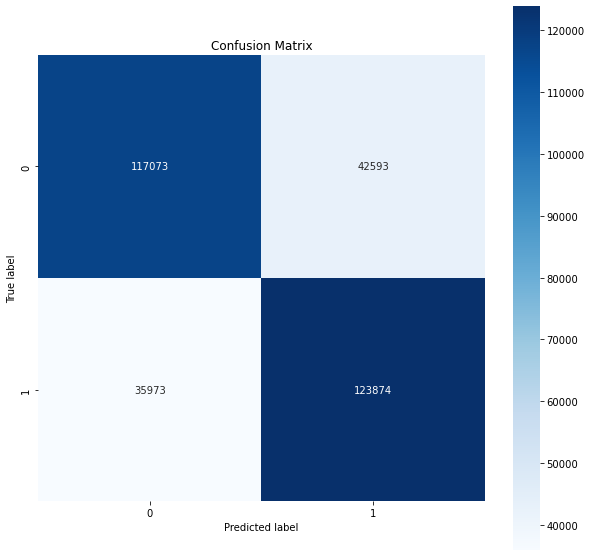

In [17]:
#word2vec cbow model
lr_cbow, y_pred_cbow = classificate_lr(matrix_train_cbow, matrix_test_cbow, y_train, y_test)
conf_matrix(y_test, y_pred_cbow)

#### Skip-Gram

Trained model. The training process lasted 17.586995 seconds.
Accuracy Score: 75.25%
Precision Score: 74.42%
Recall Score: 77.01%
F1 Score: 75.69%


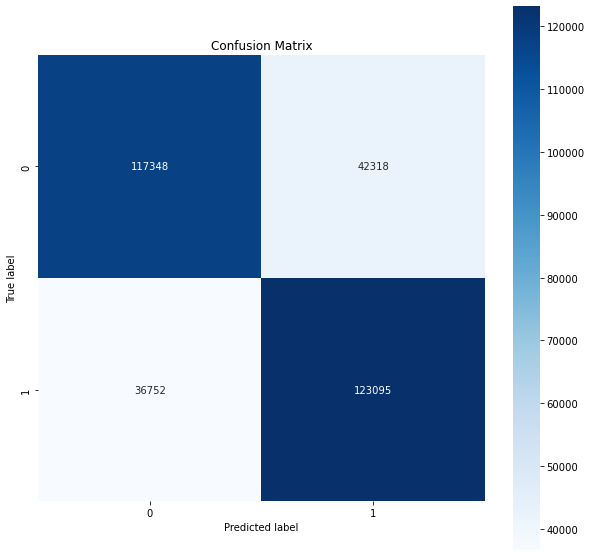

In [18]:
#word2vec skipgram model
lr_sg, y_pred_sg = classificate_lr(matrix_train_sg, matrix_test_sg, y_train, y_test)
conf_matrix(y_test, y_pred_sg)

### Exporting Word2Vec models

In [19]:
w2v_cbow.save("models/word2vec_cbow.model")

In [20]:
w2v_sg.save("models/word2vec_sg.model")

## Comparative Performance Analysis of Vectorization Methods
In the task of classifying tweet sentiments, different vectorization methods showcased varying degrees of effectiveness:<b>

CountVectorizer and TF-IDF Vectoriz</b>er: Both methods exhibited comparable outcomes, with accuracy levels hovering around 59%, precision at approximately 58%, and F1 scores near 61%. Notably, the training phase for these techniques was swift, concluding in just about 4 to 5 seconds<b>.

Word2Vec (CBOW and Skip-Gram): These models clearly outperformed the previous methods. They achieved accuracy levels exceeding 75%, precision rates surpassing 74%, and F1 scores above 75%. Such results underscore their enhanced capability in discerning the sentiment behind tweets.

In summation, while the Word2Vec models demanded a more extended training period, the trade-off in performance was undoubtedly favorable. Their intricate design, which captures the contextual relationships between words, proves to be advantageous in sentiment analysis endeavors, especially when nuanced understanding is paramount.